# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [24]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

# Disable warnings for more clear output
import warnings 
warnings.filterwarnings('ignore')

In [25]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print 'training label shape:', train_labels.shape
print 'test label shape:', test_labels.shape
print 'dev label shape:', dev_labels.shape
print 'labels names:', newsgroups_train.target_names

training label shape: (2034L,)
test label shape: (677L,)
dev label shape: (676L,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [26]:
def P1(num_examples):
    train_data_sample, train_label_sample = train_data[:num_examples], train_labels[:num_examples]

    # Print labels and the text associated with the label
    for s, t in zip(range(num_examples), train_label_sample):
        print("--------------------------------------")
        print("*****")
        print(newsgroups_train.target_names[t])
        print("*****")
        print("\n".join(newsgroups_train.data[s].split("\n")[:10]))
    
P1(3)

--------------------------------------
*****
comp.graphics
*****
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?
--------------------------------------
*****
talk.religion.misc
*****


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruptio

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [27]:
def P2():
    print("--------------------------------------")
    print("*****")
    print "Question 2a"
    print("*****")
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    print("Vocabulary Size: " + str(X_train_counts.shape[1]))
    print("Average non-zero features per example: " + str(X_train_counts.nnz / X_train_counts.shape[0]))
    print("Fraction of non-zero entries to total: " + str(round((X_train_counts.nnz / (X_train_counts.shape[0] * X_train_counts.shape[1]))*100, 2)) + "%")
    print("--------------------------------------")
    print("*****")
    print "Question 2b"
    print("*****")
    print "0th feature string: " + str(count_vect.get_feature_names()[0])
    print "Last feature string: " + str(count_vect.get_feature_names()[-1])
    print("--------------------------------------")
    print("*****")
    print "Question 2c"
    print("*****")
    cv = CountVectorizer(vocabulary=["atheism", "graphics", "space", "religion"])
    special_counts = cv.fit_transform(train_data)
    print "Array shape: " + str(special_counts.shape)
    print("Vocabulary Size: " + str(special_counts.shape[1]))
    print("Average non-zero features per example: " + str(special_counts.nnz / special_counts.shape[0]))
    print("Fraction of non-zero entries to total: " + str(round((special_counts.nnz / (special_counts.shape[0] * special_counts.shape[1]))*100, 2)) + "%")
    print("--------------------------------------")
    print("*****")
    print "Question 2d"
    print("*****")
    cv = CountVectorizer(analyzer='word', ngram_range= (2,3))
    special_counts = cv.fit_transform(train_data)
    print "Array shape: " + str(special_counts.shape)
    print("Vocabulary Size: " + str(special_counts.shape[1]))
    print("Average non-zero features per example: " + str(special_counts.nnz / special_counts.shape[0]))
    print("Fraction of non-zero entries to total: " + str(round((special_counts.nnz / (special_counts.shape[0] * special_counts.shape[1]))*100, 2)) + "%")
    print("--------------------------------------")
    print("*****")
    print "Question 2e"
    print("*****")
    cv = CountVectorizer(min_df=10)
    special_counts = cv.fit_transform(train_data)
    print "Array shape: " + str(special_counts.shape)
    print("Vocabulary Size: " + str(special_counts.shape[1]))
    print("Average non-zero features per example: " + str(special_counts.nnz / special_counts.shape[0]))
    print("Fraction of non-zero entries to total: " + str(round((special_counts.nnz / (special_counts.shape[0] * special_counts.shape[1]))*100, 2)) + "%")
    print("--------------------------------------")
    print("*****")
    print "Question 2f"
    print("*****")
    count_vect = CountVectorizer()
    cv = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    X_dev_counts = cv.fit_transform(dev_data)
    x = count_vect.get_feature_names()
    y = cv.get_feature_names()
    z = set(y) - set(x)
    print "Words in dev data missing in train data: " + str(len(z))
    print "Fraction of dev data words missing from train data vocab: " + str(round(len(z)/X_dev_counts.shape[1] * 100, 2)) + "%"


P2()

--------------------------------------
*****
Question 2a
*****
Vocabulary Size: 26879
Average non-zero features per example: 96.7059980334
Fraction of non-zero entries to total: 0.36%
--------------------------------------
*****
Question 2b
*****
0th feature string: 00
Last feature string: zyxel
--------------------------------------
*****
Question 2c
*****
Array shape: (2034, 4)
Vocabulary Size: 4
Average non-zero features per example: 0.268436578171
Fraction of non-zero entries to total: 6.71%
--------------------------------------
*****
Question 2d
*****
Array shape: (2034, 510583)
Vocabulary Size: 510583
Average non-zero features per example: 342.024582104
Fraction of non-zero entries to total: 0.07%
--------------------------------------
*****
Question 2e
*****
Array shape: (2034, 3064)
Vocabulary Size: 3064
Average non-zero features per example: 72.6760078663
Fraction of non-zero entries to total: 2.37%
--------------------------------------
*****
Question 2f
*****
Words in dev d

(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

--------------------------------------
*****
KNeighborsClassifier
*****


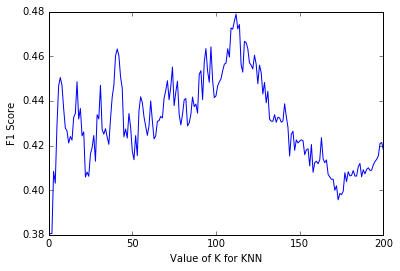

The optimal value for k is 112
--------------------------------------
*****
MultinomialNB
*****


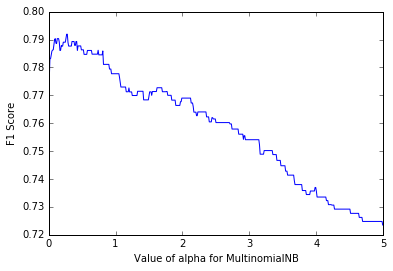

The optimal value for alpha is 0.27
--------------------------------------
*****
LogisticRegression
*****


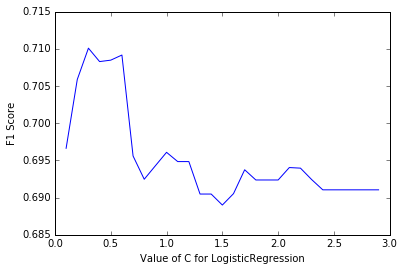

The optimal value for C is 0.3
--------------------------------------
*****
Sum of Squared Coefficients vs Values of C
*****


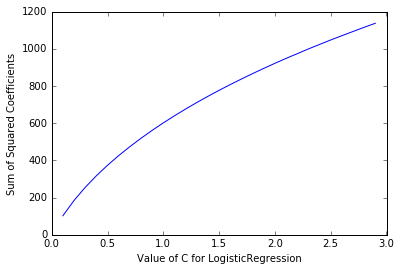

In [28]:
def P3():
    # Get the data ready to fit a model by tokenizing the text
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    X_dev_counts = count_vect.transform(dev_data)
    
    # There was a deprication warning I tried to suppress
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    
    # Fit a KNN classifier, loop through multiple values of k and plot with F1 Scores.
    print("--------------------------------------")
    print("*****")
    print "KNeighborsClassifier"
    print("*****")
    k_values = range(1, 201)
    k_scores = []
    for i in k_values:
        model = KNeighborsClassifier(n_neighbors=i)
        nn = model.fit(X_train_counts, train_labels)
        dev_predicted_labels = model.predict(X_dev_counts)
        k_scores.append(metrics.f1_score(dev_labels, dev_predicted_labels))
    
    plt.plot(k_values, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('F1 Score')
    plt.show()
    
    # Find the optimal value of k
    max_y = max(k_scores)
    max_x = k_values[k_scores.index(max_y)]
    print "The optimal value for k is " + str(max_x)

    # Fit a Multinomial Naive Bayes classifier, loop through multiple values of 
    # alpha (smoothing) and plot with F1 Scores.
    print("--------------------------------------")
    print("*****")
    print "MultinomialNB"
    print("*****")
    alphas = [x * 0.01 for x in range(1, 501)]
    alpha_scores = []
    for i in alphas:
        model = MultinomialNB(alpha=i)
        nb = model.fit(X_train_counts, train_labels)
        dev_predicted_labels = model.predict(X_dev_counts)
        alpha_scores.append(metrics.f1_score(dev_labels, dev_predicted_labels))
        
    plt.plot(alphas, alpha_scores)
    plt.xlabel('Value of alpha for MultinomialNB')
    plt.ylabel('F1 Score')
    plt.show()

    # Find the optimal value of alpha
    max_y = max(alpha_scores)
    max_x = alphas[alpha_scores.index(max_y)]
    print "The optimal value for alpha is " + str(max_x)

    # Fit a Logistic Regression classifier, loop through multiple values of 
    # C (inverse regularization) and plot with F1 Scores.
    print("--------------------------------------")
    print("*****")
    print "LogisticRegression"
    print("*****")
    c = [x * 0.1 for x in range(1, 30)]
    c_scores = []
    lrcoef_per_score = []
    for i in c:
        model = LogisticRegression(penalty='l2', C=i)
        lr = model.fit(X_train_counts, train_labels)
        dev_predicted_labels = model.predict(X_dev_counts)
        c_scores.append(metrics.f1_score(dev_labels, dev_predicted_labels))
        lrcoef_per_score.append(np.sum(np.square(lr.coef_)))
    
    plt.plot(c, c_scores)
    plt.xlabel('Value of C for LogisticRegression')
    plt.ylabel('F1 Score')
    plt.show()
    
    # Find the optimal value of C
    max_y = max(c_scores)
    max_x = c[c_scores.index(max_y)]
    print "The optimal value for C is " + str(max_x)
    
    # Plot the values of C vs sum of all the squared coefficients
    print("--------------------------------------")
    print("*****")
    print "Sum of Squared Coefficients vs Values of C"
    print("*****")    
    plt.plot(c, lrcoef_per_score)
    plt.xlabel('Value of C for LogisticRegression')
    plt.ylabel('Sum of Squared Coefficients')
    plt.show()

P3()

ANSWER:
a. The distance function probably doesn't not work so well with text counts as features.
b. In general, it seems Naive Bayes works better on small training sets while logistic regression works better or larger training sets.
c. As you decrease regularization, is this case L2, the sum of the squared coefficients increases. 

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [29]:
def P4():
    
    # vectorize the data and fit a logistic regression model
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    
    categories = newsgroups_train.target_names
    model = LogisticRegression(penalty='l2', C=0.6)
    lr = model.fit(X_train_counts, train_labels)
    
    # print the coefficients and the labels for the top 5 largest weighted features
    # using single words as the vocabulary
    print("Unigram")
    for i in range(4):
        print("--------------------------------------")
        print categories[i]
        coeff = lr.coef_[i]
        index_top5 = np.argsort(coeff)[-5:]
        index_top5 = list(index_top5)
        print lr.coef_[i][index_top5]
        print "  " + str(count_vect.get_feature_names()[index_top5[0]]) + "    " + str(count_vect.get_feature_names()[index_top5[1]]) + "     " + str(count_vect.get_feature_names()[index_top5[2]]) + "    " + str(count_vect.get_feature_names()[index_top5[3]]) + "       " + str(count_vect.get_feature_names()[index_top5[4]])
    
    # # vectorize the data as word pairs and fit a logistic regression model
    cv = CountVectorizer(analyzer = "word", ngram_range = (2,2))
    X_bigram_counts = cv.fit_transform(train_data)
    
    categories = newsgroups_train.target_names
    model = LogisticRegression(penalty='l2', C=0.6)
    lr_bigram = model.fit(X_bigram_counts, train_labels)
    
    # print the coefficients and the labels for the top 5 largest weighted features
    # using word pairs as the vocabulary
    print("")
    print("")
    print("Bigram")
    for i in range(4):
        print("--------------------------------------")
        print categories[i]
        coeff = lr_bigram.coef_[i]
        index_top5 = np.argsort(coeff)[-5:]
        index_top5 = list(index_top5)
        print lr_bigram.coef_[i][index_top5]
        print "  " + str(cv.get_feature_names()[index_top5[0]]) + "    " + str(cv.get_feature_names()[index_top5[1]]) + "     " + str(cv.get_feature_names()[index_top5[2]]) + "    " + str(cv.get_feature_names()[index_top5[3]]) + "       " + str(cv.get_feature_names()[index_top5[4]])

P4()

Unigram
--------------------------------------
alt.atheism
[ 0.81422112  0.83213799  0.83783434  0.86618001  0.88413639]
  deletion    atheism     religion    bobby       atheists
--------------------------------------
comp.graphics
[ 0.87879894  0.98937065  1.11299049  1.17617879  1.70518719]
  computer    3d     file    image       graphics
--------------------------------------
sci.space
[ 0.7839394   0.82299968  0.89225957  1.06670996  1.94032682]
  spacecraft    launch     nasa    orbit       space
--------------------------------------
talk.religion.misc
[ 0.78378185  0.79559789  0.90023995  0.97474664  0.98550979]
  order    fbi     blood    christian       christians


Bigram
--------------------------------------
alt.atheism
[ 0.47546243  0.49827235  0.53114848  0.5815704   0.64884761]
  look up    you are     was just    cheers kent       claim that
--------------------------------------
comp.graphics
[ 0.7944764   0.79641156  0.86095261  0.86915465  1.16311524]
  out there  

ANSWER: The most surprising / troubling is the "cheers kent" bigram for atheism and religion. Someone in those two newsgroups were very active. I think this would limit the model's ability to generalize, as "cheers kent" may be specific to those news groups. It might be prudent to remove the closings of messages and words after like cheers, sincerely, best regards, etc.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [30]:
def empty_preprocessor(s):
    return s

import re
    
def better_preprocessor(s):
    # the preprocessor runs through the train and dev data to remove returns, underscores, punctuation,
    # numerics, turns muplitle spaces to one space, makes everything lowercase, and removes
    # short words.
    #s = re.sub("\n", " ", s)
    #s = re.sub("_", " ", s)
    #s = re.sub(r'[^\w\s]','',s)
    s = re.sub("[^a-zA-Z]+", " ", s)
    #s = re.sub("  ", " ", s)
    s = s.lower()
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    s = shortword.sub('', s)
    return s

def P5():
    
    # import the re package and make the samples again
    import re
    
    count_vect = CountVectorizer(preprocessor=empty_preprocessor)
    X_train_counts = count_vect.fit_transform(train_data)
    X_dev_counts = count_vect.transform(dev_data)
    
    print("--------------------------------------")
    print("*****")
    print "LogisticRegression without Preprocessed Text"
    print("*****")
    model = LogisticRegression(penalty='l2', C=0.6)
    doit = model.fit(X_train_counts, train_labels)
    dev_predicted_labels = model.predict(X_dev_counts)
    print "F1 Score is: " + str(metrics.f1_score(dev_labels, dev_predicted_labels))


    # train the better preprocessor, hopefully better
    cv = CountVectorizer(preprocessor=better_preprocessor)
    X_trainproc_counts = cv.fit_transform(train_data)
    X_devproc_counts = cv.transform(dev_data)
    
    # compare the size difference of the before and after processing
    print "The size of the dictionary was reduced by " + str(X_train_counts.shape[1] - X_trainproc_counts.shape[1]) + " words."
    
    # determine the F1 Score for preprocessed text
    print("")
    print("")
    print("--------------------------------------")
    print("*****")
    print "LogisticRegression with Preprocessed Text"
    print("*****")
    model = LogisticRegression(penalty='l2', C=0.6)
    doit = model.fit(X_trainproc_counts, train_labels)
    dev_predicted_labels = model.predict(X_devproc_counts)
    print "F1 Score is: " + str(metrics.f1_score(dev_labels, dev_predicted_labels))

P5()

--------------------------------------
*****
LogisticRegression without Preprocessed Text
*****
F1 Score is: 0.703700268795
The size of the dictionary was reduced by 9689 words.


--------------------------------------
*****
LogisticRegression with Preprocessed Text
*****
F1 Score is: 0.707845864817


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

L1 number of learned weights not equal to zero = 1815.
L1 accuracy = 0.695266272189
L2 number of learned weights not equal to zero = 107516.
L2 accuracy = 0.717455621302


Retrain the prunned L1 with L2


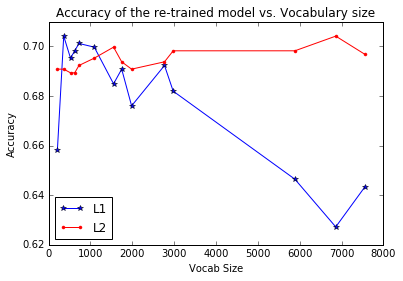

In [32]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    # Import Accuracy Score funtion
    from sklearn.metrics import accuracy_score
    
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(train_data)
    X_dev_counts = count_vect.transform(dev_data)
    
    # get the initial accuracy for l1 and l2 regularization without pruning l2
    model = LogisticRegression(penalty='l1', tol=.01)
    lr_l1 = model.fit(X_train_counts, train_labels)
    dev_predicted_labels = model.predict(X_dev_counts)
    print "L1 number of learned weights not equal to zero = " + str(np.sum(lr_l1.coef_ != 0)) + "."
    print "L1 accuracy = " + str(accuracy_score(dev_labels, dev_predicted_labels))
    
    model = LogisticRegression(penalty='l2', tol=.01)
    lr_l2 = model.fit(X_train_counts, train_labels)
    dev_predicted_labels = model.predict(X_dev_counts)
    print "L2 number of learned weights not equal to zero = " + str(np.sum(lr_l2.coef_ != 0)) + "."
    print "L2 accuracy = " + str(accuracy_score(dev_labels, dev_predicted_labels))
    
    print ""
    print ""
    print "Retrain the prunned L1 with L2"
    
    # Set the C's for the L1 prunning process. 
    #c = [x * 0.1 for x in range(1, 10)]
    c = [0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 50.0, 75.0, 100.0]
    l1accuracy = []
    l2accuracy = []
    vocab_size = []
    
   
    for i in c:
        # Iteratively prune the L1 model and add the L1 accuracy to a list
        count_vect = CountVectorizer()
        X_train_counts = count_vect.fit_transform(train_data)
        X_dev_counts = count_vect.transform(dev_data)
        model = LogisticRegression(penalty='l1', tol=.01, C=i)
        lr_l1 = model.fit(X_train_counts, train_labels)
        number_l1vocab = sum(np.sum(lr_l1.coef_ != 0, axis = 0)>0)
        dev_predicted_labels = model.predict(X_dev_counts)
        l1accuracy.append(accuracy_score(dev_labels, dev_predicted_labels))
        
        # Get the pruned vocabulary and append the number of words to a list, 
        # also store the shortened list by word in an array to use in the L2 model
        vocab = np.array(count_vect.get_feature_names())
        new_vocab = vocab[np.sum(lr_l1.coef_ != 0, axis=0)>0]
        vocab_size.append(len(new_vocab))
        
        # Use the pruned vocabulary to train an L2 model and append the new accuracy to a list
        count_vect = CountVectorizer(vocabulary = new_vocab)
        X_train_counts = count_vect.fit_transform(train_data)
        X_dev_counts = count_vect.transform(dev_data)
        model = LogisticRegression(penalty='l1', tol=.01)
        lr_l2 = model.fit(X_train_counts, train_labels)
        dev_predicted_labels = model.predict(X_dev_counts)
        l2accuracy.append(accuracy_score(dev_labels, dev_predicted_labels))
    
    # Plot the accuracy of the L1 and the retrained L2 against the size of the vocabulary.
    plt.plot(vocab_size, l1accuracy, 'b-*', label='L1')
    plt.plot(vocab_size, l2accuracy, 'r.-', label='L2')
    plt.ylabel("Accuracy")
    plt.xlabel("Vocab Size")
    plt.title("Accuracy of the re-trained model vs. Vocabulary size")
    plt.legend(loc=3)
    plt.show()
    

P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [34]:
def P7():
    
    # Perform the Term Frequency times Inverse Document Frequency transformation.
    tfidf_transformer = TfidfVectorizer()
    X_train_tfidf = tfidf_transformer.fit_transform(train_data)
    X_dev_tfidf = tfidf_transformer.transform(dev_data)
    
    # Print the F1-Score for the Logistic model after the transformation
    print("--------------------------------------")
    print("*****")
    print "LogisticRegression with TFIDF Vectorizer"
    print("*****")
    model = LogisticRegression(penalty='l2', C=100)
    lr = model.fit(X_train_tfidf, train_labels)
    dev_predicted_labels = model.predict(X_dev_tfidf)
    print "F1 Score is: " + str(metrics.f1_score(dev_labels, dev_predicted_labels))
    
    # Get the probabilities for each example in the dev set
    probs = lr.predict_proba(X_dev_tfidf)
    num_dev_labels = X_dev_tfidf.shape[0]
    r_ratio_list = []
    
    # For each example calculate the R-Ratio and store in a list
    for i in range(num_dev_labels):
        max_prob = max(probs[i].tolist())
        correct_label_prob = probs[i, dev_labels[i]]
        r_ratio = max_prob / correct_label_prob
        r_ratio_list.append(r_ratio)
    
    # Turn the r_ratio list into an array and get the top 3 R-Ratios
    r_ratio_top3 = np.argsort(np.array(r_ratio_list))[-3:]
    
    print ""
    print ""
    print("--------------------------------------")
    print("*****")
    print "Documents with the highest R Ratio (the most aggregious )"
    print("*****")
    
    # For each of the top 3, print the predicted value and correct value along with R-Ratio and the text. 
    for i in r_ratio_top3:
            print("--------------------------------------")
            print "R ratio: {}".format(np.array(r_ratio_list)[i])
            print "Vector of predicted probabilities: {}".format(probs[i])
            print "Predicted category: {}".format(dev_predicted_labels[i])
            print "Predicted category name: {}".format(newsgroups_train.target_names[dev_predicted_labels[i]])
            print "Correct category: {}".format(dev_labels[i])
            print "Correct category name: {}".format(newsgroups_train.target_names[dev_labels[i]])
            print "Document text:"
            print dev_data[i] + "\n"
            print("--------------------------------------")

P7()

--------------------------------------
*****
LogisticRegression with TFIDF Vectorizer
*****
F1 Score is: 0.759766242785


--------------------------------------
*****
Documents with the highest R Ratio (the most aggregious )
*****
--------------------------------------
R ratio: 287.306682902
Vector of predicted probabilities: [ 0.00241987  0.02006462  0.28226977  0.69524574]
Predicted category: 3
Predicted category name: talk.religion.misc
Correct category: 0
Correct category name: alt.atheism
Document text:

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...


--------------------------------------
--------------------------------------
R ratio: 325.003961817
Vector of predicted probabilities: [ 0.00291176  0.9797443   0.01432939  0.00301456]
Predicted category: 1
Predicted category name: comp.graphics
Correct category: 3
Correct category name: talk.religion.misc
Document text:
Can anyone provide me

ANSWER:
1. TDIFD first get the number of occurances divided by the number of words in documents as the frequency. Then it downscales the weights of words that are more frequent in the corpus by scaling according to the document frequency. CountVectorizer() is simply the number of occurances of words in the corpus. 

2. The model is making a few mistakes: 1) confusing an atheism document for a religion document which makes sense because of overlap. 2) the model also gets confused when documents talk about books / has words that appear in graphics more often. The examples have some computer language that I suspect is making the model think it is a graphics document. 3) short documents are probably harder to predict. 

3. Reducing the weight certain words have across documents may help. Using the max_df parameter may help reduce weight of frequently occuring words throughout the corpus.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [37]:
def P8():
    
    # Establish a baseline
    tfidf_transformer = TfidfVectorizer()
    X_train_tfidf = tfidf_transformer.fit_transform(train_data)
    X_dev_tfidf = tfidf_transformer.transform(dev_data)
    
    model = LogisticRegression(C=100)
    lr = model.fit(X_train_tfidf, train_labels)
    dev_predicted_labels = lr.predict(X_dev_tfidf)
    print "F1 Score before error analysis is: " + str(metrics.f1_score(dev_labels, dev_predicted_labels))    
    
    print ""
    print("--------------------------------------")
    print ""
    # Perform the Term Frequency times Inverse Document Frequency transformation using stop_words (eliminating words
    # that have small contributions to context) and ignoring words that have a frequency of more than 20% of corpus.
    tfidf_transformer = TfidfVectorizer(stop_words='english', max_df = 0.2)
    X_train_tfidf = tfidf_transformer.fit_transform(train_data)
    X_dev_tfidf = tfidf_transformer.transform(dev_data)
    
    model = LogisticRegression(C=100)
    lr = model.fit(X_train_tfidf, train_labels)
    dev_predicted_labels = lr.predict(X_dev_tfidf)
    print "F1 Score after error analysis is: " + str(metrics.f1_score(dev_labels, dev_predicted_labels))    
    
P8()

F1 Score before error analysis is: 0.759766242785

--------------------------------------

F1 Score after error analysis is: 0.78712795152
